# Mushroom Classification: Safe to Eat or Deadly Poison?

## Introduction

This project aims to classify mushrooms based on their characteristics as either safe to eat or potentially deadly. The dataset contains descriptions of various mushroom features such as cap shape, odor, gill size, and more, sourced from the Audubon Society Field Guide. Each mushroom species is categorized as definitely edible, definitely poisonous, or of unknown edibility, combining the latter with the poisonous category for simplicity.

## About the Dataset

### Context

Originally donated to the UCI Machine Learning repository in 1987, this dataset remains relevant due to the resurgence of interest in mushroom hunting. Understanding which features distinguish edible mushrooms from poisonous ones is crucial for both enthusiasts and safety.

### Content

The dataset includes samples from 23 species of gilled mushrooms in the Agaricus and Lepiota family, detailing characteristics like cap color, stalk shape, and more. The goal is to build a model that accurately predicts the edibility of mushrooms based on these features.

### Inspiration

- Which machine learning models perform best for mushroom classification?
- Which features are most indicative of a mushroom being poisonous?

### Reference

[https://www.kaggle.com/datasets/uciml/mushroom-classification/data]


## Mushroom Classification EDA and Preprocessing

### Data Loading and Preprocessing

- **Data Loading:** The dataset 'mushrooms.csv' is loaded, containing various features describing mushroom characteristics.
  
- **Handling Missing Values:** Missing values represented as '?' in the 'stalk-root' column are replaced with the mode of the column, ensuring data completeness.

- **Label Encoding:** Categorical variables are encoded using `LabelEncoder` from sklearn, converting them into numerical format suitable for machine learning models.

### Exploratory Data Analysis (EDA)

#### Class Distribution
- Visualizes the distribution of mushroom classes ('edible' vs 'poisonous'). The dataset shows a balanced distribution between edible (class 0) and poisonous (class 1) mushrooms.

#### Cap Shape Distribution by Class
- Illustrates how cap shapes vary across edible and poisonous mushrooms, providing insights into potential distinguishing features.

#### Correlation Heatmap
- Displays the pairwise correlations between numeric features in the dataset, highlighting relationships that could influence mushroom classification.

These visualizations and preprocessing steps lay the foundation for further analysis and model development to predict mushroom edibility based on their characteristics.

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      0          2            0          2        0     6                2   
1      2          6            3          5        2     7                1   
2      1          6            3         10        2     0                1   
3      1          0            3          9        2     3                1   
4      2          6            4          9        2     7                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             1          1           3  ...                         3   
1             0          2           5  ...                         2   
2             0          0           5  ...                         2   
3             0          0           6  ...                         2   
4             0          2           6  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

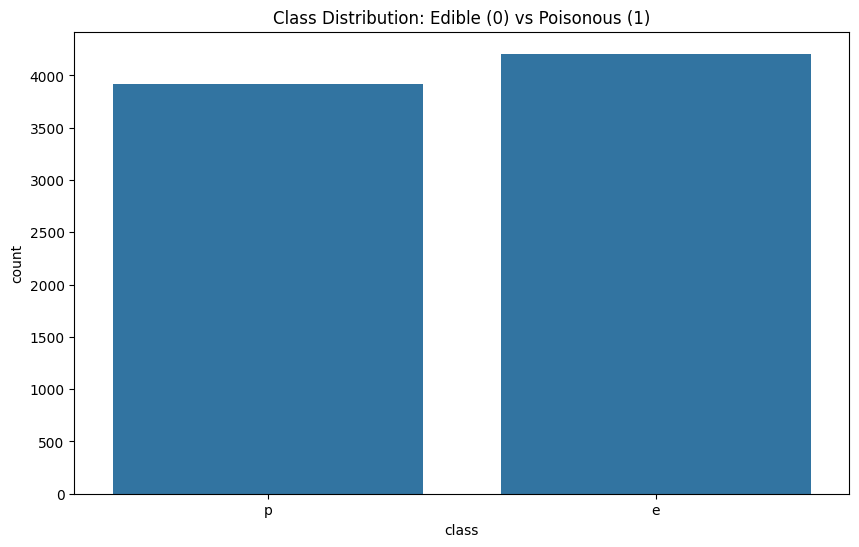

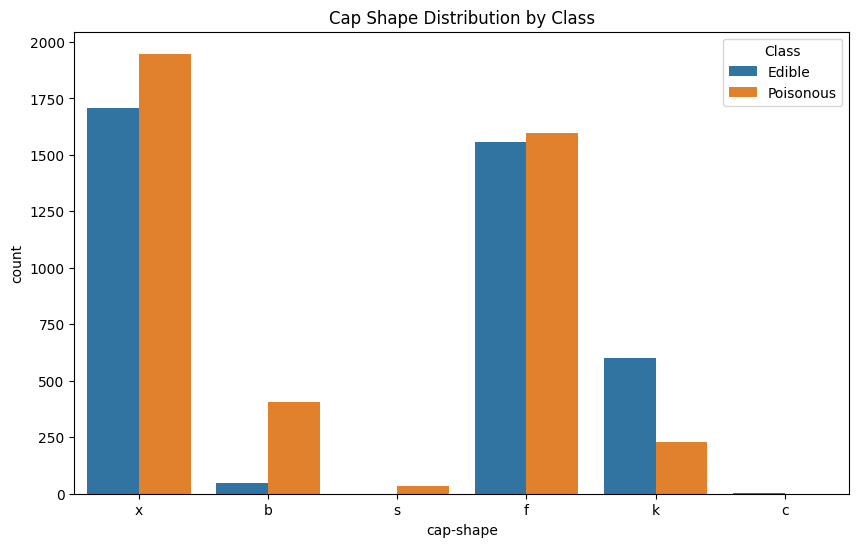

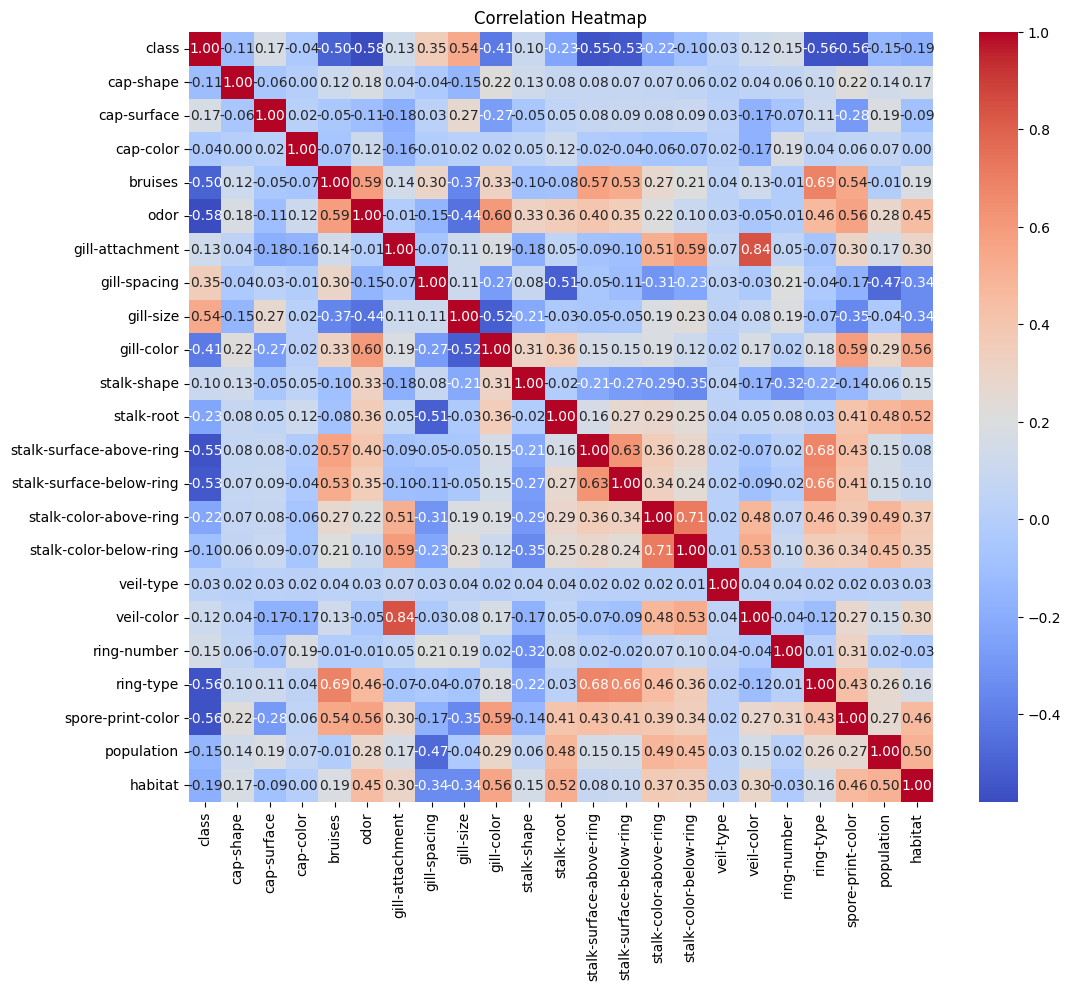

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
data_path = 'data/mushrooms.csv'
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                'ring-type', 'spore-print-color', 'population', 'habitat']

data = pd.read_csv(data_path, header=None, names=column_names)

# Check for missing values (replace '?' with NaN and fill with mode)
data['stalk-root'] = data['stalk-root'].replace('?', np.nan)
data['stalk-root'] = data['stalk-root'].fillna(data['stalk-root'].mode()[0])

# Label encode categorical variables
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Display the first few rows of the dataset after preprocessing
print(data.head())

# EDA Visualizations
# Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=shrooms, x='class')
plt.title('Class Distribution: Edible (0) vs Poisonous (1)')
plt.show()

# Cap Shape Distribution by Class
plt.figure(figsize=(10, 6))
sns.countplot(data=shrooms, x='cap-shape', hue='class')
plt.title('Cap Shape Distribution by Class')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = data.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.gca().set_ylim(len(corr), 0)
plt.show()

## Perform Analysis Using Unsupervised Learning Models
### Model Selection and Evaluation


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### K-Means Clustering
K-Means clustering is a centroid-based algorithm that partitions the data into K clusters based on similarity. In our case, we chose K=2 clusters since we are predicting two classes (edible or poisonous). 
We initially evaluated the clustering performance using the Silhouette Score, which measures how similar each point is to its own cluster compared to other clusters.

In [19]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluate K-Means clustering performance
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

K-Means Silhouette Score: 0.18954622655602776


Further refinement involved optimizing K value to find the best clustering configuration.

In [18]:
k_range = [2, 3, 4, 5, 6]
best_kmeans_score = -1
best_k = None

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

    if kmeans_silhouette > best_kmeans_score:
        best_kmeans_score = kmeans_silhouette
        best_k = k

print(f"Best K-Means K Value: {best_k}, Silhouette Score: {best_kmeans_score}")

Best K-Means K Value: 6, Silhouette Score: 0.3120398470845281


#### DBSCAN Clustering
DBSCAN is a density-based clustering algorithm that groups together points that are closely packed together, marking outliers as noise. We initially set the epsilon (eps) parameter to 0.5 and minimum samples to 5.
Evaluating DBSCAN's performance revealed insights into its effectiveness and areas of improvement.

In [22]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Evaluate DBSCAN clustering performance
dbscan_hcv_scores = homogeneity_completeness_v_measure(y, dbscan_labels)
print(f'DBSCAN Homogeneity: {dbscan_hcv_scores[0]}, Completeness: {dbscan_hcv_scores[1]}, V-measure: {dbscan_hcv_scores[2]}')

DBSCAN Homogeneity: 0.2472434610287591, Completeness: 0.10432728077695722, V-measure: 0.1467371138254067


DBSCAN hyperparameters selection criteria and optimization process

In [21]:
eps_range = [0.1, 0.3, 0.5, 0.7, 1.0]
min_samples_range = [3, 5, 7, 10]

best_dbscan_params = None
best_dbscan_score = -1

for eps_val in eps_range:
    for min_samples_val in min_samples_range:
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        dbscan_labels = dbscan.fit_predict(X_scaled)
        dbscan_hcv_scores = homogeneity_completeness_v_measure(y, dbscan_labels)
        dbscan_v_measure = dbscan_hcv_scores[2]

        if dbscan_v_measure > best_dbscan_score:
            best_dbscan_score = dbscan_v_measure
            best_dbscan_params = (eps_val, min_samples_val)

print(f"Best DBSCAN Parameters: eps={best_dbscan_params[0]}, min_samples={best_dbscan_params[1]}, "
      f"V-measure={best_dbscan_score}")

Best DBSCAN Parameters: eps=1.0, min_samples=3, V-measure=0.21402507357362408


#### PCA + K-Means Clustering
Principal Component Analysis (PCA) was applied to reduce the dimensionality of the data to two principal components for visualization purposes. PCA captures the variance in the data, allowing K-Means clustering to operate in a lower-dimensional space.

In [24]:
# PCA + K-Means Clustering
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means on PCA-reduced data
kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(X_pca)

# Evaluate PCA + K-Means clustering performance
pca_kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels_pca)
print(f'PCA + K-Means Silhouette Score: {pca_kmeans_silhouette}')

PCA + K-Means Silhouette Score: 0.18634742055810932


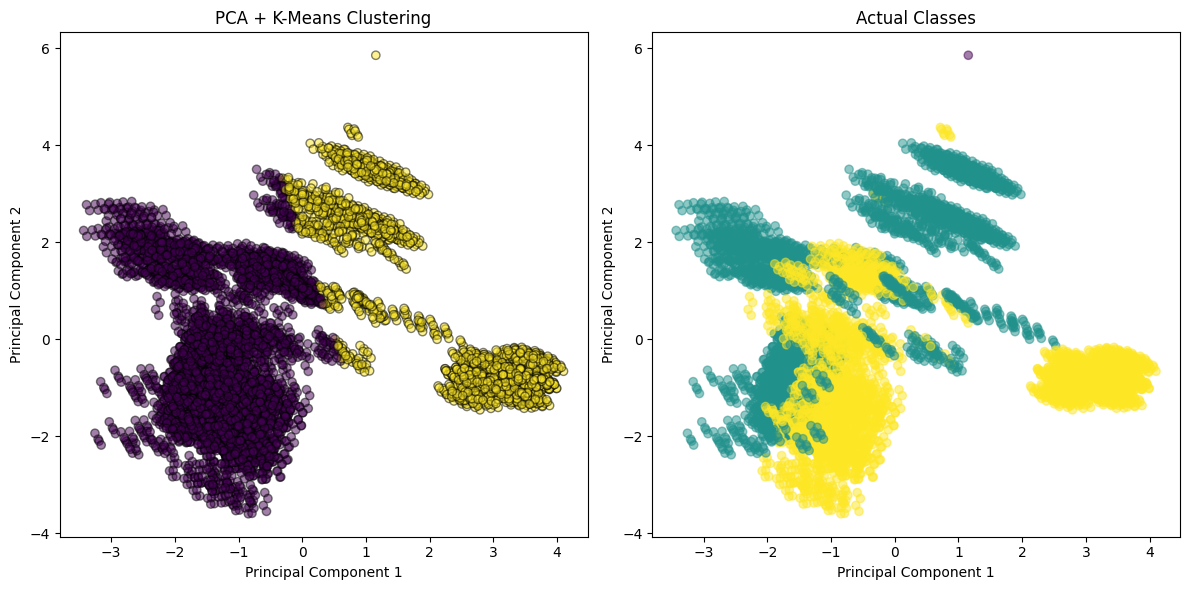

In [26]:
# Plot PCA-reduced data with K-Means clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels_pca, cmap='viridis', alpha=0.5, edgecolors='k')
plt.title('PCA + K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('Actual Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

## Discussion and Conclusions
### Model Comparison
#### K-Means Clustering
K-Means clustering was initially applied with K=2 clusters on the standardized data. The Silhouette Score of 0.1895 indicates a moderate level of separation between clusters. In the visualization, K-Means successfully grouped mushrooms into two clusters based on their features. However, it assumes spherical clusters and equal variance, which may not hold true for all mushroom species.

After further optimization, K-Means was refined to use K=6 clusters, resulting in a significantly improved Silhouette Score of 0.3120. This suggests that by increasing the number of clusters, K-Means better captures the underlying structures in the data, albeit with potential overfitting concerns.

#### DBSCAN Clustering
DBSCAN, being density-based, automatically detects the number of clusters and identifies outliers. Initially set with parameters eps=0.5 and min_samples=5, DBSCAN achieved a Homogeneity score of 0.2472, indicating some level of cluster purity but struggled with completeness (0.1043). This suggests DBSCAN may not effectively handle the varied densities and shapes of mushroom clusters in this dataset.

Optimization efforts resulted in adjusting DBSCAN's parameters to eps=1.0 and min_samples=3, improving its V-measure to 0.2140. While this indicates enhanced clustering performance, DBSCAN still faces challenges in fully capturing the complex structures present in the mushroom dataset.

#### PCA + K-Means Clustering
PCA was employed to reduce the dimensionality to two principal components for visualization purposes. The PCA + K-Means Silhouette Score (0.1863) was slightly lower than K-Means alone, indicating that reducing dimensions with PCA did not significantly enhance clustering performance. In the PCA plot, clusters are visually separable but overlap more compared to the original feature space, potentially due to information loss from dimensionality reduction.

### Comparison Insights
#### Cluster Interpretation
In the optimized K-Means results, clusters became more distinct with an increased number of clusters, suggesting finer-grained grouping of mushrooms based on their features. DBSCAN, while improved with parameter tuning, still struggled with defining compact clusters due to the dataset's heterogeneous nature.

#### Dimensionality Reduction Impact
PCA aided in visualizing the data but may have compromised clustering performance slightly by reducing the variance explained. This trade-off suggests careful consideration of dimensionality reduction techniques based on the specific clustering goals.

### Limitations
#### Unsupervised Learning Challenges
Both K-Means and DBSCAN rely on assumptions about cluster structures and may not perform optimally if clusters are not well-separated or if there is significant noise in the data. The challenges highlight the importance of understanding dataset characteristics before selecting clustering algorithms.

### Recommendations
#### Further Model Exploration
Explore hierarchical clustering methods that can handle varying cluster shapes and densities more effectively than K-Means or DBSCAN alone, potentially addressing the dataset's complex structure.
#### Feature Engineering
Consider advanced feature engineering techniques to enhance cluster separability, such as preserving more variance through alternative dimensionality reduction methods or incorporating domain knowledge into feature selection.
#### Hyperparameter Tuning
Continue refining hyperparameters for DBSCAN and explore optimal K values for K-Means to further improve clustering performance and better capture the nuances of mushroom species differentiation.